# Monaco grand prix speed map

In [23]:
import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

import fastf1 as ff1

In [24]:
year = 2025
wknd = 8
ses = 'FP3'
driver = 'LEC'
colormap = mpl.cm.plasma

session = ff1.get_session(year, wknd, ses)
weekend = session.event
session.load()
lap = session.laps.pick_drivers(driver).pick_fastest()

# Get telemetry data
x = lap.telemetry['X']              # values for x-axis
y = lap.telemetry['Y']              # values for y-axis
color = lap.telemetry['Speed']      # value to base color gradient on

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

core           INFO 	Loading data for Monaco Grand Prix - Practice 3 [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Driver 23: Lap timing integrity check failed for 1 lap(s)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '5', '6', '10', '12', '1

In [25]:
lap

Time                      0 days 01:08:51.208000
Driver                                       LEC
DriverNumber                                  16
LapTime                   0 days 00:01:10.953000
LapNumber                                   24.0
Stint                                        4.0
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:18.396000
Sector2Time               0 days 00:00:33.660000
Sector3Time               0 days 00:00:18.897000
Sector1SessionTime        0 days 01:07:58.651000
Sector2SessionTime        0 days 01:08:32.311000
Sector3SessionTime        0 days 01:08:51.208000
SpeedI1                                    222.0
SpeedI2                                    211.0
SpeedFL                                    268.0
SpeedST                                    280.0
IsPersonalBest                              True
Compound                                    SOFT
TyreLife            

In [26]:
lap.telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2025-05-24 11:24:51.818,0 days 01:07:40.255000,,237.871944,0 days 00:00:00,11078.237373,275.931246,7,99.000000,False,12,interpolation,0.076756,0.000023,OnTrack,-7672.387240,-6429.770432,502.249346
3,2025-05-24 11:24:51.875,0 days 01:07:40.312000,,237.871944,0 days 00:00:00.057000,11116.000000,277.000000,7,99.000000,False,12,car,4.471667,0.001360,OnTrack,-7674.662449,-6375.674733,502.428614
4,2025-05-24 11:24:52.128,0 days 01:07:40.565000,,237.871944,0 days 00:00:00.310000,11229.849971,279.371874,7,99.790625,False,12,pos,24.111062,0.007331,OnTrack,-7680.000000,-6195.000000,503.000000
5,2025-05-24 11:24:52.195,0 days 01:07:40.632000,30,237.871944,0 days 00:00:00.377000,11260.000000,280.000000,7,100.000000,False,12,car,29.360556,0.008928,OnTrack,-7680.111299,-6163.383068,503.089973
6,2025-05-24 11:24:52.515,0 days 01:07:40.952000,30,224.894167,0 days 00:00:00.697000,11390.000000,285.000000,7,100.000000,False,12,car,54.693889,0.016630,OnTrack,-7669.122230,-6003.774011,503.028949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,2025-05-24 11:26:02.348,0 days 01:08:50.785000,44,649.221669,0 days 00:01:10.530000,10780.382038,268.067856,7,100.000000,False,12,pos,3245.557799,0.986859,OnTrack,-7651.000000,-6790.000000,502.000000
531,2025-05-24 11:26:02.435,0 days 01:08:50.872000,44,645.524167,0 days 00:01:10.617000,10923.000000,269.000000,7,100.000000,False,12,car,3252.107500,0.988851,OnTrack,-7653.816454,-6742.717500,501.860410
532,2025-05-24 11:26:02.715,0 days 01:08:51.152000,44,633.390833,0 days 00:01:10.897000,10972.000000,275.000000,7,100.000000,False,12,car,3273.496389,0.995355,OnTrack,-7663.705515,-6586.271661,501.910214
533,2025-05-24 11:26:02.747,0 days 01:08:51.184000,44,633.390833,0 days 00:01:10.929000,10990.400000,275.000000,7,100.000000,False,12,pos,3275.944392,0.996099,OnTrack,-7665.000000,-6565.000000,502.000000


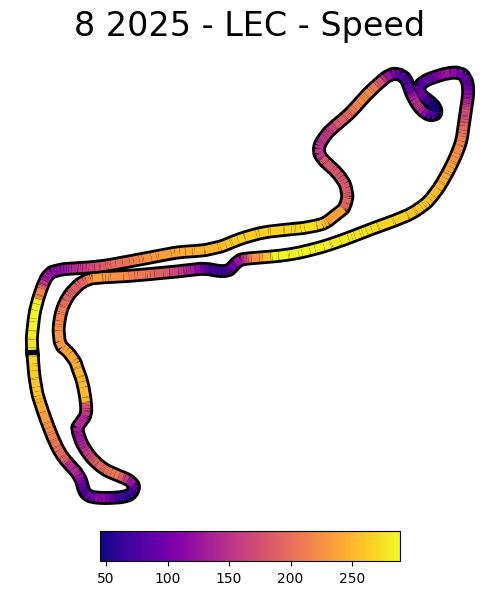

In [27]:
# We create a plot with title and adjust some setting to make it look good.
# fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(6,6))
fig.suptitle(f'{weekend.name} {year} - {driver} - Speed', size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')


# After this, we plot the data itself.
# Create background track line
ax.plot(lap.telemetry['X'], lap.telemetry['Y'],
        color='black', linestyle='-', linewidth=10, zorder=0)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=colormap, norm=norm,
                    linestyle='-', linewidth=6)

# Set the values used for colormapping
lc.set_array(color)

# Merge all line segments together
line = ax.add_collection(lc)


# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap,
                                   orientation="horizontal")


# Show the plot
plt.show()


---

This is the end of the notebook.